# Statistik-Labor Testat Aufgabe 2
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Untersuchen Sie die Bevölkerungsentwicklung der USA. <br>
In der Datei **sr_aufg_2_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält zwei Spalten fester Breite: Jahreszahl und Anzahl der Einwohner der USA in Millionen (zu einem festen Stichtag in dem angegebenen Jahr).

## a) Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

In [47]:
import pandas as pd

data = pd.read_csv('sr_aufg_2_82.txt', sep='\s+', decimal=',', header=None, names=['Jahr', 'Einwohner'])
#data.head(5)
#data['Jahr'] = data['Jahr'].astype(int)
data

,Jahr,Einwohner
0,1790,3.929214
1,1800,5.308483
2,1820,9.638453
3,1830,12.866020
4,1840,17.069453
5,1850,23.191876
6,1860,31.443321
7,1870,39.818449
8,1880,50.189209
9,1890,62.979766


## b) Streudiagramm erstellen
Stellen Sie die Bevölkerungsentwicklung in einem Streudiagramm dar.

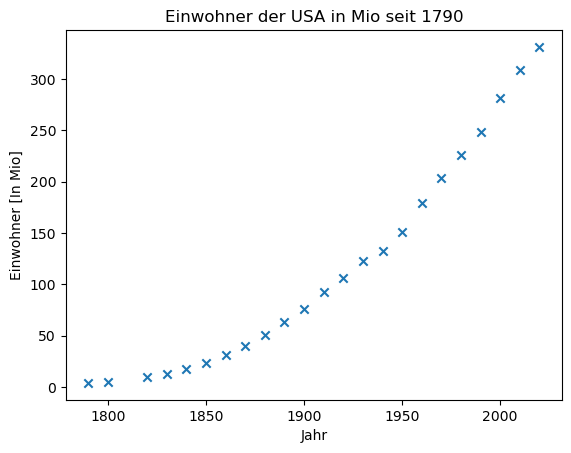

In [49]:
import matplotlib.pyplot as plt

plt.scatter(data['Jahr'], data['Einwohner'], marker = 'x')

plt.xlabel('Jahr')
plt.ylabel('Einwohner [In Mio]')
plt.title('Einwohner der USA in Mio seit 1790')

plt.show()

## c) Regressionskurven bestimmen
Untersuchen Sie je nach Matrikelnummer Ihre 5 Funktionen um eine Regressionskurve durch die Punkte zu legen:<br>

| Gerade Matrikelnummer-Endung: | Ungerade Matrikelnummer-Endung: |
| :- | :- |
| Lineare Funktion: $\;\;$ $y = ax+b$ | Lineare Funktion: $\;\;$ $y = ax+b$ |
| Polynom 2. Grades: $y = ax^2+bx+c$ | Polynom 2. Grades: $y = ax^2+bx+c$ |
| Polynom 4. Grades: $y=ax^4+bx^3+cx^2+dx+e$ | Polynom 3. Grades: $y=ax^3+bx^2+cx+d$ |
| Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ | Polynom 6. Grades: $y=ax^6+bx^5+cx^4+dx^3+gx^2+ux+v$ |
| Exponentialfunktion: $y=a \cdot{\rm e}^{bx}$ | Logarithmusfunktion: $y=a \cdot\ln{(x)}-b$ |

Stellen Sie **in einer Tabelle den Regressionstyp** (z.B. lineare Funktion, Polynom 2. Grades, …), die **geschätzten Koeffizienten mit Achsenabschnitt und das Bestimmtheitsmaß** dar.

***Tipp:***<br>
Verwenden Sie für die Schätzung der Regressionskurve und des Bestimmtheitsmaßes standardisierte Eingangswerte (Jahreszahlen)

In [51]:
from sklearn.linear_model import LinearRegression

einw_model = LinearRegression()


In [53]:
import numpy as np

x = data['Jahr'].to_numpy().reshape(-1,1)

einw_model.fit(x, data['Einwohner'])

LinearRegression()

In [55]:
lin_coef = einw_model.coef_.round(4)
lin_achs = einw_model.intercept_.round(4)
lin_achs

-2653.019

In [57]:
print('Die Gleichung der Regressionsgeraden für die Einwohnerzahl lautet: y = %.2fx %.2f'
%(einw_model.coef_, einw_model.intercept_))


Die Gleichung der Regressionsgeraden für die Einwohnerzahl lautet: y = 1.45x -2653.02


/tmp/ipykernel_55763/1617038104.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Die Gleichung der Regressionsgeraden für die Einwohnerzahl lautet: y = %.2fx %.2f'


In [59]:
y_predict = einw_model.predict(x)

y_predict

array([-54.78644605, -40.27118027, -11.24064871,   3.27461707,
        17.78988286,  32.30514864,  46.82041442,  61.3356802 ,
        75.85094598,  90.36621177, 104.88147755, 119.39674333,
       133.91200911, 148.42727489, 162.94254067, 177.45780646,
       191.97307224, 206.48833802, 221.0036038 , 235.51886958,
       250.03413537, 264.54940115, 279.06466693])

In [61]:
einw_model.predict([[2030]])

array([293.57993271])

In [64]:
np.corrcoef(data['Jahr'], data['Einwohner'])

array([[1.        , 0.96003451],
       [0.96003451, 1.        ]])

In [66]:
rxy = np.corrcoef(data['Jahr'], data['Einwohner'])[0,1]

print('Der lineare Korrelationskoeffizient für das Jahr mit den Einwohnern lauter: %.4f' %rxy)

Der lineare Korrelationskoeffizient für das Jahr mit den Einwohnern lauter: 0.9600


In [68]:
# Bestimmtheitsmaß Lineare Funktion

from sklearn.metrics import r2_score

lin_best = r2_score(data['Einwohner'], y_predict).round(4)
lin_best# r2_score(y, y_predict)

0.9217

In [70]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)
x_scaled

array([[-1.75828978],
       [-1.61069611],
       [-1.31550877],
       [-1.16791511],
       [-1.02032144],
       [-0.87272777],
       [-0.7251341 ],
       [-0.57754044],
       [-0.42994677],
       [-0.2823531 ],
       [-0.13475944],
       [ 0.01283423],
       [ 0.1604279 ],
       [ 0.30802157],
       [ 0.45561523],
       [ 0.6032089 ],
       [ 0.75080257],
       [ 0.89839624],
       [ 1.0459899 ],
       [ 1.19358357],
       [ 1.34117724],
       [ 1.4887709 ],
       [ 1.63636457]])

In [72]:
# POLYNOM 2.GRADES

In [74]:
from sklearn.preprocessing import PolynomialFeatures

quad_jahr = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_scaled)

quad_jahr



array([[-1.75828978e+00,  3.09158294e+00],
       [-1.61069611e+00,  2.59434195e+00],
       [-1.31550877e+00,  1.73056333e+00],
       [-1.16791511e+00,  1.36402570e+00],
       [-1.02032144e+00,  1.04105584e+00],
       [-8.72727772e-01,  7.61653764e-01],
       [-7.25134105e-01,  5.25819470e-01],
       [-5.77540437e-01,  3.33552957e-01],
       [-4.29946770e-01,  1.84854225e-01],
       [-2.82353103e-01,  7.97232746e-02],
       [-1.34759435e-01,  1.81601054e-02],
       [ 1.28342319e-02,  1.64717509e-04],
       [ 1.60427899e-01,  2.57371109e-02],
       [ 3.08021567e-01,  9.48772855e-02],
       [ 4.55615234e-01,  2.07585241e-01],
       [ 6.03208901e-01,  3.63860978e-01],
       [ 7.50802568e-01,  5.63704497e-01],
       [ 8.98396236e-01,  8.07115796e-01],
       [ 1.04598990e+00,  1.09409488e+00],
       [ 1.19358357e+00,  1.42464174e+00],
       [ 1.34117724e+00,  1.79875638e+00],
       [ 1.48877090e+00,  2.21643881e+00],
       [ 1.63636457e+00,  2.67768901e+00]])

In [76]:
quad_einw_model = LinearRegression()
quad_einw_model.fit(quad_jahr, data['Einwohner'])

quad_coef = quad_einw_model.coef_.round(4)
quad_achs = quad_einw_model.intercept_.round(4)

quad_achs

                                    


87.4229

In [78]:
y_predict_quad = quad_einw_model.predict(quad_jahr)

y_predict_quad

array([  6.03342456,   5.56434167,   8.64029529,  12.18533179,
        17.06840809,  23.2895242 ,  30.8486801 ,  39.74587579,
        49.98111129,  61.55438658,  74.46570168,  88.71505657,
       104.30245126, 121.22788575, 139.49136003, 159.09287412,
       180.032428  , 202.31002168, 225.92565516, 250.87932844,
       277.17104151, 304.80079439, 333.76858706])

In [80]:
quad_best = r2_score(data['Einwohner'], y_predict_quad).round(4)

In [82]:
# POLYNOM 3.GRADES

In [84]:
trip_jahr = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_scaled)

trip_jahr

array([[-1.75828978e+00,  3.09158294e+00, -5.43589867e+00],
       [-1.61069611e+00,  2.59434195e+00, -4.17869649e+00],
       [-1.31550877e+00,  1.73056333e+00, -2.27657125e+00],
       [-1.16791511e+00,  1.36402570e+00, -1.59306622e+00],
       [-1.02032144e+00,  1.04105584e+00, -1.06221159e+00],
       [-8.72727772e-01,  7.61653764e-01, -6.64716392e-01],
       [-7.25134105e-01,  5.25819470e-01, -3.81289630e-01],
       [-5.77540437e-01,  3.33552957e-01, -1.92640320e-01],
       [-4.29946770e-01,  1.84854225e-01, -7.94774770e-02],
       [-2.82353103e-01,  7.97232746e-02, -2.25101139e-02],
       [-1.34759435e-01,  1.81601054e-02, -2.44724555e-03],
       [ 1.28342319e-02,  1.64717509e-04,  2.11402272e-06],
       [ 1.60427899e-01,  2.57371109e-02,  4.12895063e-03],
       [ 3.08021567e-01,  9.48772855e-02,  2.92242501e-02],
       [ 4.55615234e-01,  2.07585241e-01,  9.45789983e-02],
       [ 6.03208901e-01,  3.63860978e-01,  2.19484181e-01],
       [ 7.50802568e-01,  5.63704497e-01

In [86]:
trip_einw_model = LinearRegression()
trip_einw_model.fit(trip_jahr, data['Einwohner'])

trip_coef = trip_einw_model.coef_.round(4)
trip_achs = trip_einw_model.intercept_.round(4)

trip_achs

                                    


87.3056

In [88]:
y_predict_trip = trip_einw_model.predict(trip_jahr)

y_predict_trip

array([  4.22329734,   4.68523437,   9.01076786,  12.91446527,
        18.00551709,  24.30397378,  31.82988584,  40.60330373,
        50.64427792,  61.97285889,  74.60909712,  88.57304308,
       103.88474724, 120.56426008, 138.63163207, 158.10691369,
       179.01015542, 201.36140772, 225.18072107, 250.48814595,
       277.30373282, 305.64753217, 335.53959448])

In [90]:
trip_best = r2_score(data['Einwohner'], y_predict_trip).round(4)


In [92]:
#POLYNOMG 6. GRADES

In [94]:
six_jahr = PolynomialFeatures(degree=6, include_bias=False).fit_transform(x_scaled)

six_einw_model = LinearRegression()
six_einw_model.fit(six_jahr, data['Einwohner']) # Maisdaten sind die y Werte

six_coef = six_einw_model.coef_.round(4)
six_achs = six_einw_model.intercept_.round(4)
six_achs

88.7467

In [96]:
y_predict_six = six_einw_model.predict(six_jahr)

y_predict_six

array([  3.30801603,   6.51626771,   9.49356736,  12.20774694,
        16.6552554 ,  22.98908085,  31.1059901 ,  40.76442448,
        51.68118235,  63.60688827,  76.38024883,  89.9610952 ,
       104.44221234, 120.03995485, 137.06364957, 155.86378478,
       176.75898612, 199.94177919, 225.36313879, 252.5958249 ,
       280.67650526, 307.92666468, 331.75230102])

In [98]:
six_best = r2_score(data['Einwohner'], y_predict_six).round(4)


In [100]:
# LOGARITHMUS FUNKTION

In [102]:
from scipy.optimize import curve_fit

def f_log(z,a0,b): return a0 * z -b

In [104]:
x_log = np.log(data['Jahr'])

coefs_log, cov_log = curve_fit(f_log, x_log, data['Einwohner'])


In [106]:
log_predict = f_log(x_log, *coefs_log)
log_predict

0     -57.435492
1     -42.104832
2     -11.697382
3       3.381265
4      18.377740
5      33.292932
6      48.127719
7      62.882962
8      77.559510
9      92.158198
10    106.679848
11    121.125268
12    135.495255
13    149.790592
14    164.012052
15    178.160392
16    192.236363
17    206.240700
18    220.174128
19    234.037363
20    247.831107
21    261.556055
22    275.212888
Name: Jahr, dtype: float64

In [108]:
# zu (b):
y_mean = np.mean(data['Einwohner'])
sumsquared_t = np.sum((data['Einwohner']-y_mean)**2)
sumsquared_ne = np.sum((data['Einwohner']-log_predict)**2)

R_squared_log2 = 1-(sumsquared_ne/sumsquared_t)
R_squared_log2.round(4) 

0.9126

In [110]:
import pandas as pd

# Daten für die Koeffizienten, Achsenabschnitt und Bestimmtheitsmaß für jede Funktion
data = {
    'Funktion': ['Lineare Funktion', 'Polynom 2. Grades', 'Polynom 3. Grades', 'Polynom 6. Grades', 'Ln - Funktion'],
    'Koeffizienten': [[lin_coef], [quad_coef], [trip_coef], [six_coef], [coefs_log]],
    'Achsenabschnitt': [lin_achs, quad_achs, trip_achs, six_achs, cov_log],
    'Bestimmtheitsmaß': [lin_best, quad_best, trip_best, six_best, R_squared_log2]
}

# Erstellen des DataFrame
df = pd.DataFrame(data)

# Ausgabe des DataFrames
print(df)


            Funktion                                      Koeffizienten  \
0   Lineare Funktion                                         [[1.4515]]   
1  Polynom 2. Grades                               [[100.289, 30.7117]]   
2  Polynom 3. Grades                       [[98.3603, 30.8947, 1.0394]]   
3  Polynom 6. Grades  [[94.3657, 20.1145, 7.6949, 11.306, -2.1591, -...   
4      Ln - Funktion           [[2751.84624775504, 20668.683805508037]]   

                                     Achsenabschnitt  Bestimmtheitsmaß  
0                                          -2653.019          0.921700  
1                                            87.4229          0.999200  
2                                            87.3056          0.999300  
3                                            88.7467          0.999600  
4  [[34536.91428976542, 260883.96638996535], [260...          0.912596  


## d) Beste Kurve wählen
Wählen Sie aus den von Ihnen untersuchten Möglichkeiten die am besten geeignete Kurve. **Erläutern** Sie Ihre Wahl.

In [113]:
# Ich würde mich für dass Polynom 6. Grades entscheiden da dort
# dass Bestimmtheitsmaß am nächsten an der 1 ist

## e) Streudiagramm mit Regressionskurve
Zeichnen Sie in das Streudiagramm die optimale Regressionskurve aus 4) ein. Dabei sollen auf der x-Achse die Jahreszahlen und auf der y-Achse die Bevölkerungszahl angegeben sein.

In [118]:

plt.scatter(data['Jahr'], data['Einwohner'], marker ='x')

plt.plot(data['Jahr'], y_predict_six, color='red') 


plt.xlabel('Jahr')
plt.ylabel('Einwohner [In Mio]')
plt.title('Einwohner der USA in Mio seit 1790')

plt.show()

KeyError: 'Jahr'

## f) Prognose für das Jahr 2030
Berechnen Sie aus den Ihnen vorgelegten Daten eine Prognose über die Bevölkerungszahl der USA im Jahr 2030. **Erläutern** Sie Ihr Vorgehen.

***Tipp:***<br>
Beim Wert für die Prognose sollten Sie überlegen, ob Ihr Wert stimmen kann oder ob er nicht vielleicht völlig unrealistisch ist. <br>
Der Grund für unrealistische Werte ist dabei evtl. gar nicht in der Wahl der Regressionsvariante zu suchen, sondern evtl. darin, dass numerische Probleme vorliegen und die geschätzten Koeffizienten mit zu wenigen Nachkommastellen verwendet werden!

In [ ]:
seinw_model.predict([[2030]])
